# Google Data Analytics Professional Certificate Capstone Project

## Case Study: How Does a Bike-Share Navigate Speedy Success?

This project is part of the Google Data Analytics Professional Certification. Cyclistic, a bike-share company in Chicago has been chosen as the subject of the project. The project is aimed at finding the usage trends of annual and casual users. 

The company has a fleet of over 5800 geotagged bikes and a network of over 600 stations across Chicago. The service offers 3 types of plans: A single ride pass; a full-day pass; and annual memberships. Single-ride and full-day customers are called Casual Riders while Annual plan customers are Cyclistic Members

Annual Members have been identified as much more profitable than Casual Riders. The management has outlined that the flexibility of products will help attract more customers overall, but real growth will only be seen with more members. 

Rather than spending money on attracting all-new customers who have not heard of and/or never tried the service, it will be more efficient and beneficial to convert the existing Casual Riders who already know and trust Cyclistic 

##### The goal of this project is to understand how casual riders and annual members differ. Why Casual Riders would be willing to upgrade to a membership. 

The data is provided by Motivate International Inc with the following licence: https://www.divvybikes.com/data-license-agreement
The data includes ride details of all the rides done on the bikes of the company during the calendar year 2022. No personal or customer data was shared. This means we can not identify the members or even the number of each category of rider. We can only classify the rides into categories.

### 1. Preparing the data

#### Loading and verifying data

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark")

In [2]:
# Importing all 12 files
df1 = pd.read_csv('202201-divvy-tripdata.csv')
df2 = pd.read_csv('202202-divvy-tripdata.csv')
df3 = pd.read_csv('202203-divvy-tripdata.csv')
df4 = pd.read_csv('202204-divvy-tripdata.csv')
df5 = pd.read_csv('202205-divvy-tripdata.csv')
df6 = pd.read_csv('202206-divvy-tripdata.csv')
df7 = pd.read_csv('202207-divvy-tripdata.csv')
df8 = pd.read_csv('202208-divvy-tripdata.csv')
df9 = pd.read_csv('202209-divvy-tripdata.csv')
df10 = pd.read_csv('202210-divvy-tripdata.csv')
df11 = pd.read_csv('202211-divvy-tripdata.csv')
df12 = pd.read_csv('202212-divvy-tripdata.csv')

In [3]:
# Combining all 12 dataframes into 1 dataframe
tripdata = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [4]:
# Verifying the dataframe
tripdata.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
# Checking the shape of the dataset
print("The combined dataset has",tripdata.shape[0],"records and",tripdata.shape[1],"columns.")

The combined dataset has 5667717 records and 13 columns.


In [6]:
# Checking the data types
tripdata.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### 2. Processing the data

#### Cleaning Data

In [7]:
# Checking for empty values
tripdata.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [8]:
# Dropping records with null values
tripdata.dropna(subset=['start_station_name'], inplace=True)
tripdata.dropna(subset=['start_station_id'], inplace=True)
tripdata.dropna(subset=['end_station_name'], inplace=True)
tripdata.dropna(subset=['end_station_id'], inplace=True)
tripdata.dropna(subset=['end_lat'], inplace=True)
tripdata.dropna(subset=['end_lng'], inplace=True)

In [9]:
# Verifying that all records with empty values are removed
tripdata.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Records that reflect test or maintainence rides should be removed

In [10]:
# Dropping records with station names containing 'Base'
tripdata = tripdata[~tripdata['start_station_name'].str.contains('Base')]
tripdata = tripdata[~tripdata['end_station_name'].str.contains('Base')]

In [11]:
# Dropping records with station ids containing 'DIVVY'
tripdata = tripdata[~tripdata['start_station_name'].str.contains('DIVVY')]
tripdata = tripdata[~tripdata['end_station_name'].str.contains('DIVVY')]

In [12]:
# Dropping records with station ids containing 'TEST'
tripdata = tripdata[~tripdata['start_station_id'].str.contains('TEST')]
tripdata = tripdata[~tripdata['end_station_id'].str.contains('TEST')]

In [13]:
# Dropping records with station ids containing 'charging'
tripdata = tripdata[~tripdata['start_station_id'].str.contains('charging')]
tripdata = tripdata[~tripdata['end_station_id'].str.contains('charging')]

In [14]:
# Keeping only rides with a valid ride_id of 16 characters
tripdata = tripdata[tripdata['ride_id'].str.len()==16]

#### Transforming Data

Fields like started_at and ended_at need to be converted to computable time. And trip length will be calculated.

In [15]:
# Transforming the started and ended columns into datetime
tripdata['started_at'] = pd.to_datetime(tripdata['started_at'], format='%Y-%m-%d %H:%M:%S')
tripdata['ended_at'] = pd.to_datetime(tripdata['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [16]:
tripdata['month'] = pd.DatetimeIndex(tripdata["started_at"]).month

In [17]:
# Adding the new column for triplength
tripdata['trip_length'] = tripdata['ended_at'] - tripdata['started_at']

In [18]:
# Adding a new column of trip_seconds for calculations
tripdata['trip_seconds'] = tripdata['trip_length'].dt.total_seconds()

In [19]:
# Adding the new column for day of the week
tripdata['day_of_week'] = tripdata['started_at'].dt.day_name()

The latitude and longitude values are rounded to 3 places after the decimal so that they can be groupped and plotted on a map in a more intuitive way. https://blis.com/precision-matters-critical-importance-decimal-places-five-lowest-go/#:~:text=So%2C%20as%20you%20can%20see,six%20can%20identify%20a%20person states that the distance between 2 points with the precision of 3 places after the decimal is about 100 meters.

In [20]:
# Rounding the latitude and longitude values to 3 places after the decimal for the required accuracy
tripdata['start_lat'] = tripdata['start_lat'].round(3)
tripdata['start_lng'] = tripdata['start_lng'].round(3)
tripdata['end_lat'] = tripdata['end_lat'].round(3)
tripdata['end_lng'] = tripdata['end_lng'].round(3)

To keep the data relevent, we will remove the records that have a ride length of more than 24 hours and less than 1 minute.

In [21]:
# Checking how many records are valid and invalid based on the trip_length constraint
valid = tripdata[(tripdata['trip_length'] >= '0 days 00:01:00') & (tripdata['trip_length']<'1 days 00:00:00')]
invalid = tripdata[(tripdata['trip_length'] < '0 days 00:01:00') & (tripdata['trip_length']>='1 days 00:00:00')]
print("There are ",len(valid), " valid and ",len(invalid), "invalid records based on the trip length constraint.")

There are  4222071  valid and  0 invalid records based on the trip length constraint.


In [22]:
# Keeping only the rides that have a trip length of more than 1 minutes
tripdata = tripdata[tripdata['trip_length']>'0 days 00:01:00']

In [23]:
# Keeping only the rides that have a trip length of less than 24 hours
tripdata = tripdata[tripdata['trip_length']<'1 days 00:00:00']

The trips with the same start and end station and a ride shorter than 2 minutes will be filtered out.

In [24]:
# Identifying the rides with same start and end station 
tripdata['same_station'] = tripdata['start_station_id'] == tripdata['end_station_id']

In [25]:
# Filtering out records with same start and end station and less than 2 minute ride
tripdata = tripdata[~(tripdata['same_station'] & (tripdata['trip_length'] < pd.Timedelta('0 days 00:02:00')))]

In [26]:
# Dropping the same_station column as it is no longer needed
tripdata = tripdata.drop(columns=['same_station'])

In [27]:
# Checking the shape of the dataset after all cleaning and transformation.
print("The combined dataset has",tripdata.shape[0],"records and",tripdata.shape[1],"columns.")

The combined dataset has 4198497 records and 17 columns.


Now that the data preparation and transformation is over, we can proceed to analyse it

### 3. Analysing the data

#### Distribution of rides among user type

In [54]:
tripdata.describe(include=[np.number])

,start_lat,start_lng,end_lat,end_lng,month,trip_length,trip_seconds,day_of_week_index
count,4.198497e+06,4.198497e+06,4.198497e+06,4.198497e+06,4.198497e+06,4198497,4.198497e+06,4.198497e+06
mean,4.190198e+01,-8.764467e+01,4.190230e+01,-8.764495e+01,7.070903e+00,0 days 00:17:24.097305535,1.044097e+03,3.048397e+00
std,4.267613e-02,2.485534e-02,4.286484e-02,2.505811e-02,2.518611e+00,0 days 00:31:02.342903210,1.862343e+03,1.980192e+00
min,4.164900e+01,-8.783000e+01,4.164900e+01,-8.783000e+01,1.000000e+00,0 days 00:01:01,6.100000e+01,0.000000e+00
25%,4.188100e+01,-8.765800e+01,4.188100e+01,-8.765800e+01,5.000000e+00,0 days 00:06:19,3.790000e+02,1.000000e+00
50%,4.189700e+01,-8.764100e+01,4.189800e+01,-8.764200e+01,7.000000e+00,0 days 00:10:52,6.520000e+02,3.000000e+00
75%,4.192900e+01,-8.762800e+01,4.192900e+01,-8.762800e+01,9.000000e+00,0 days 00:19:24,1.164000e+03,5.000000e+00
max,4.206500e+01,-8.752500e+01,4.206500e+01,-8.752800e+01,1.200000e+01,0 days 23:59:22,8.636200e+04,6.000000e+00


In [29]:
# Checking the number of users in each type over past 12 months
member_type = tripdata["member_casual"].value_counts()
member_type

member    2509187
casual    1689310
Name: member_casual, dtype: int64

Text(0, 0.5, 'Rides in millions')

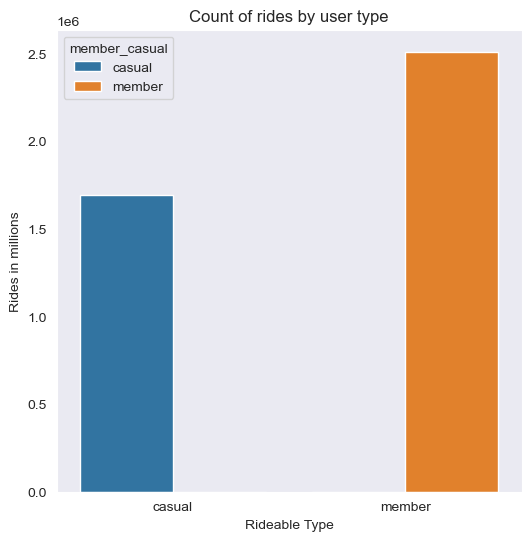

In [30]:
# Plotting the count of Member and Casual rides
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='member_casual', hue='member_casual', data=tripdata)
ax.set_title("Count of rides by user type")
ax.set_xlabel("Rideable Type")
ax.set_ylabel("Rides in millions")

C:\Users\HAL9K\AppData\Local\Temp\ipykernel_39924\1612470138.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(member_type.index, labels= ["Member", "Casual"])


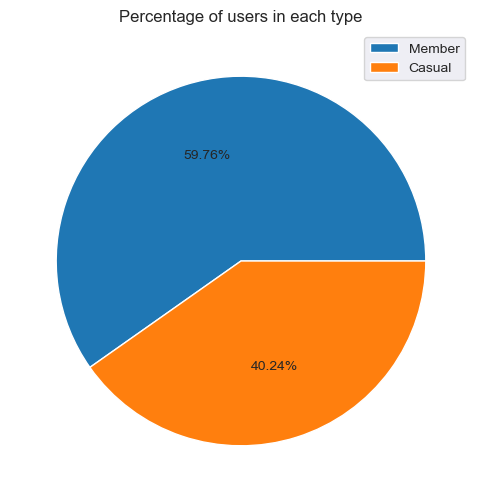

In [31]:
# Plotting a pie chart of users in each type
plt.figure(figsize=(8, 6))
plt.pie(member_type.values, autopct="%1.2f%%")
plt.title("Percentage of users in each type")
plt.legend(member_type.index, labels= ["Member", "Casual"])
plt.show()

Just shy of 60% of the rides were done by members and only about 40% of the rides were casual riders, meaning that the company is in a relatively good health.

In [32]:
# Checking the number of users over months
users_over_month = tripdata.groupby("month")["member_casual"].value_counts()
users_over_month

month  member_casual
1      member            66371
       casual            12387
2      member            72394
       casual            14869
3      member           146040
       casual            66016
4      member           176011
       casual            89562
5      member           271333
       casual           211691
6      member           315039
       casual           280463
7      member           317338
       casual           299459
8      member           319991
       casual           258482
9      member           299711
       casual           210857
10     member           252140
       casual           145024
11     member           174173
       casual            70479
12     member            98646
       casual            30021
Name: member_casual, dtype: int64

In [33]:
# Segregating the number of users into member or casual riders over months
list_month = []
list_x = []
list_y = list(users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

Text(0, 0.5, 'Count')

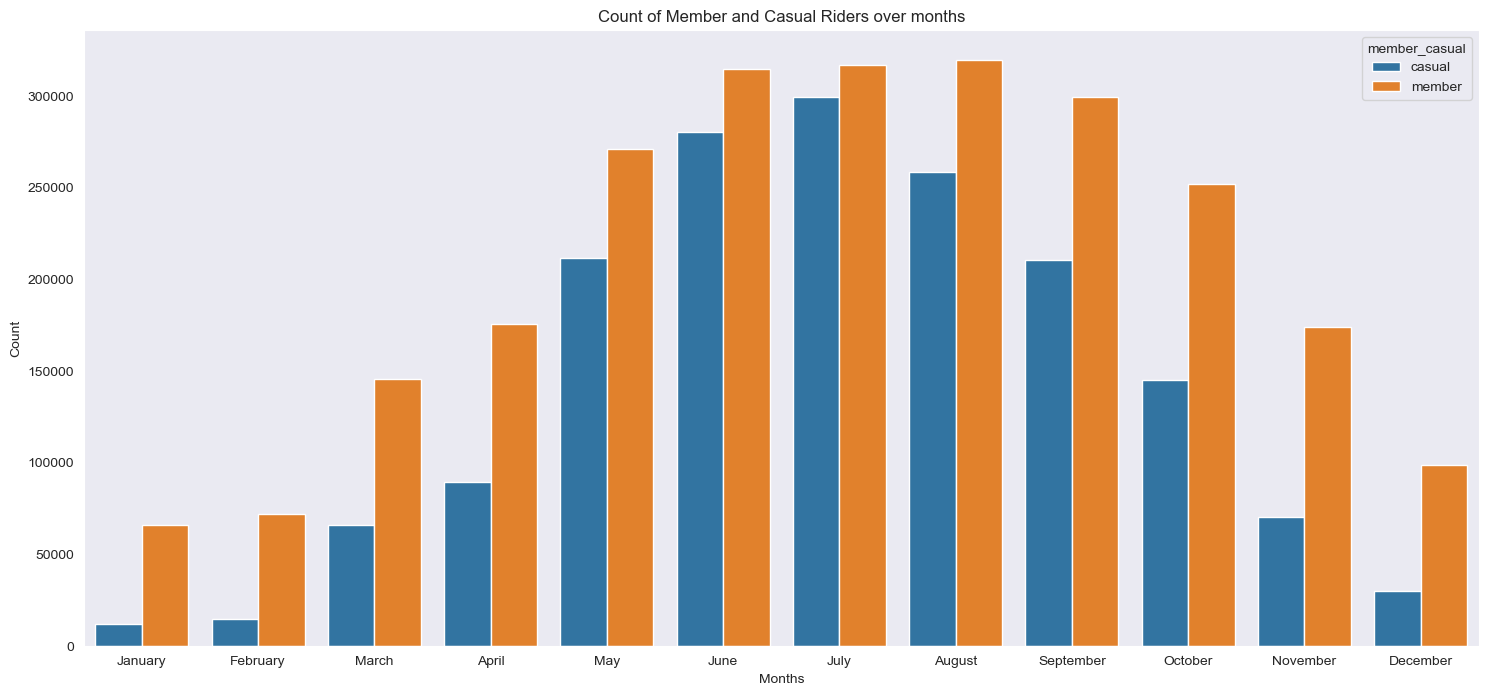

In [34]:
# Plotting the count of Member and Casual riders over months
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='month', hue='member_casual', data=tripdata)
ax.set_xticklabels(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
ax.set_title("Count of Member and Casual Riders over months")
ax.set_xlabel("Months")
ax.set_ylabel("Count")

Clearly the most rides happen during the spring and summer seasons, from the months of May to September. The gap between members and casual riders also reduces drastically during this period. The good weather attracts local customers to use the bikes, and as this is a vacation season, many tourists might also use the bikes, presumably everyone of them using as a casual user.

#### Analysing the total rides across the days of the week

In [35]:
# Assigning numbers from 0 through 1 to the days of the week for better sorting
week_day = { "Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}
tripdata["day_of_week_index"] = tripdata["day_of_week"].apply(lambda y: week_day[y])

In [36]:
# Creating new dataframes with data of member and casual riders separately
member = tripdata[tripdata['member_casual'].str.contains('member')]
casual = tripdata[tripdata['member_casual'].str.contains('casual')]

In [37]:
# Calculating the mode of day of the week
print("The most rides are on",tripdata['day_of_week'].mode())

The most rides are on 0    Saturday
Name: day_of_week, dtype: object


In [38]:
# Finding the mode of day of the week for member and cansual riders
print("Members most use the bikes on" ,member['day_of_week'].mode()),
print("Casual users most use the bikes on", casual['day_of_week'].mode())

Members most use the bikes on 0    Thursday
Name: day_of_week, dtype: object
Casual users most use the bikes on 0    Saturday
Name: day_of_week, dtype: object


In [39]:
# Counting all users by day of week 
users_week_day = tripdata.groupby("day_of_week_index")["ride_id"].count()
users_week_day.sort_index()

day_of_week_index
0    564283
1    585418
2    593187
3    620674
4    584341
5    676055
6    574539
Name: ride_id, dtype: int64

In [40]:
# Counting member users by day of week
member_week_day = member.groupby("day_of_week_index")["ride_id"].count()
member_week_day.sort_index()

day_of_week_index
0    361372
1    396324
2    397359
3    399702
4    345669
5    323614
6    285147
Name: ride_id, dtype: int64

In [41]:
# Counting casual users by day of week
casual_week_day = casual.groupby("day_of_week_index")["ride_id"].count()
casual_week_day.sort_index()

day_of_week_index
0    202911
1    189094
2    195828
3    220972
4    238672
5    352441
6    289392
Name: ride_id, dtype: int64

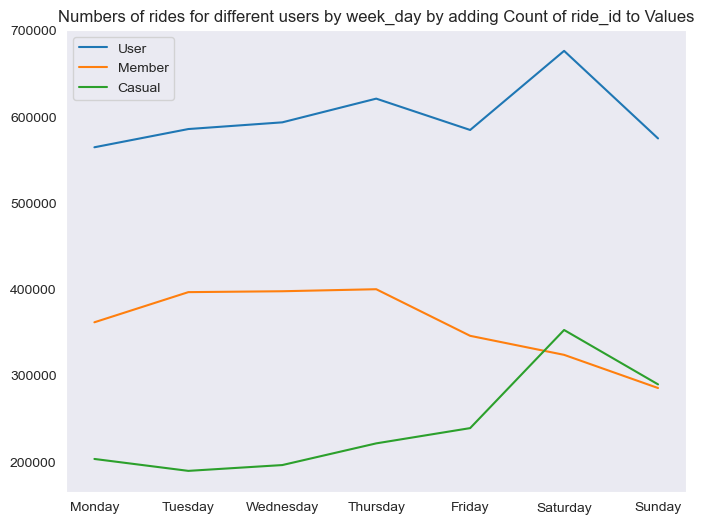

In [42]:
# Plotting the graph of Weekday vs Number of Rides
plt.figure(figsize= (8,6))
plt.plot(users_week_day.index, users_week_day.values)
plt.plot(member_week_day.index, member_week_day.values)
plt.plot(casual_week_day.index, casual_week_day.values)
plt.title("Numbers of rides for different users by week_day by adding Count of ride_id to Values")
plt.legend(["User", "Member", "Casual"])
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.xticks(users_week_day.index, labels)
plt.show()

The weekly trends suggest that the rides go up towards the end of the week from Thursday and peaking at Saturday. But upon comparing the two types of users, the trend is drastically different. Members ride more during the working week and the casual riders ride more during the weekend. 

#### Analysing the trip length

In [43]:
# Finding the average ride length 
print("The average ride length is ",tripdata['trip_length'].mean())

The average ride length is  0 days 00:17:24.097305535


In [44]:
# Finding the maximum ride length
print("The maximum ride length is ",tripdata['trip_length'].max())

The maximum ride length is  0 days 23:59:22


In [45]:
# Calculating the mean ride length for member and cansual riders
print("The average ride length for members is ",member['trip_length'].mean(), "and the average ride length of casual riders is",casual['trip_length'].mean())

The average ride length for members is  0 days 00:12:43.439376180 and the average ride length of casual riders is 0 days 00:24:20.967641818


In [46]:
# Calculating the average ride_length for all users by day of week
user_avg_ride_len_week_day = tripdata.groupby("day_of_week_index")["trip_length"].mean(numeric_only=False)
user_avg_ride_len_week_day

day_of_week_index
0   0 days 00:16:50.792625331
1   0 days 00:15:11.468685622
2   0 days 00:15:02.506585612
3   0 days 00:15:36.330041213
4   0 days 00:16:41.727782236
5   0 days 00:21:02.334441724
6   0 days 00:21:00.849348782
Name: trip_length, dtype: timedelta64[ns]

In [47]:
# Calculating the average ride_length for members by week_day
member_avg_ride_len_week_day = tripdata[tripdata["member_casual"] == "member"].groupby(
    "day_of_week_index")["trip_length"].mean(numeric_only=False)
member_avg_ride_len_week_day

day_of_week_index
0   0 days 00:12:16.252310638
1   0 days 00:12:01.670623025
2   0 days 00:12:06.106973794
3   0 days 00:12:16.251407298
4   0 days 00:12:29.914172228
5   0 days 00:14:20.927051981
6   0 days 00:14:11.839121575
Name: trip_length, dtype: timedelta64[ns]

In [48]:
# Calculating the average ride_length for members by week_day
casual_avg_ride_len_week_day = tripdata[tripdata["member_casual"] == "casual"].groupby(
    "day_of_week_index")["trip_length"].mean(numeric_only=False)
casual_avg_ride_len_week_day

day_of_week_index
0   0 days 00:24:59.732025370
1   0 days 00:21:49.268337440
2   0 days 00:21:00.443006107
3   0 days 00:21:38.239378744
4   0 days 00:22:46.429794864
5   0 days 00:27:10.909752270
6   0 days 00:27:43.859933930
Name: trip_length, dtype: timedelta64[ns]

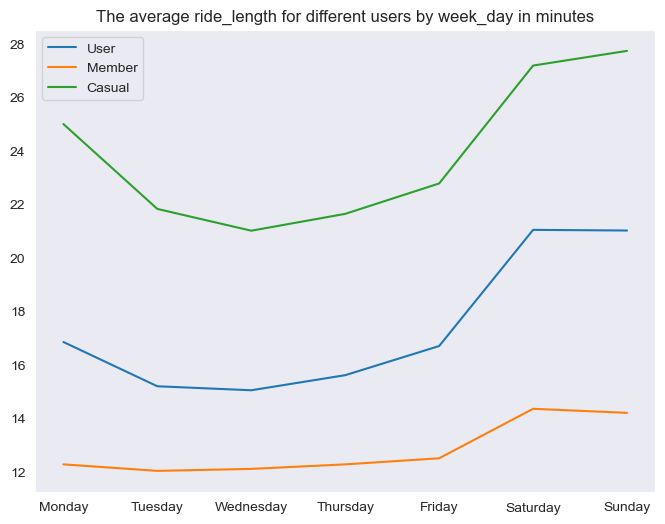

In [49]:
# Plotting the graph of Weekday vs Average ride length
plt.figure(figsize=(8, 6))
plt.plot(user_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(member_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.plot(casual_avg_ride_len_week_day/pd.Timedelta(minutes=1))
plt.title("The average ride_length for different users by week_day in minutes")
plt.legend(["User", "Member", "Casual"])
labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
plt.xticks(user_avg_ride_len_week_day.index, labels)
plt.show()

The average ride length follows the trend of the number of rides, peaking during the weekend. Upon comparing the users, it apears that the average ride length of members is almost half the average ride length of casual riders.

Text(0, 0.5, 'Rides in millions')

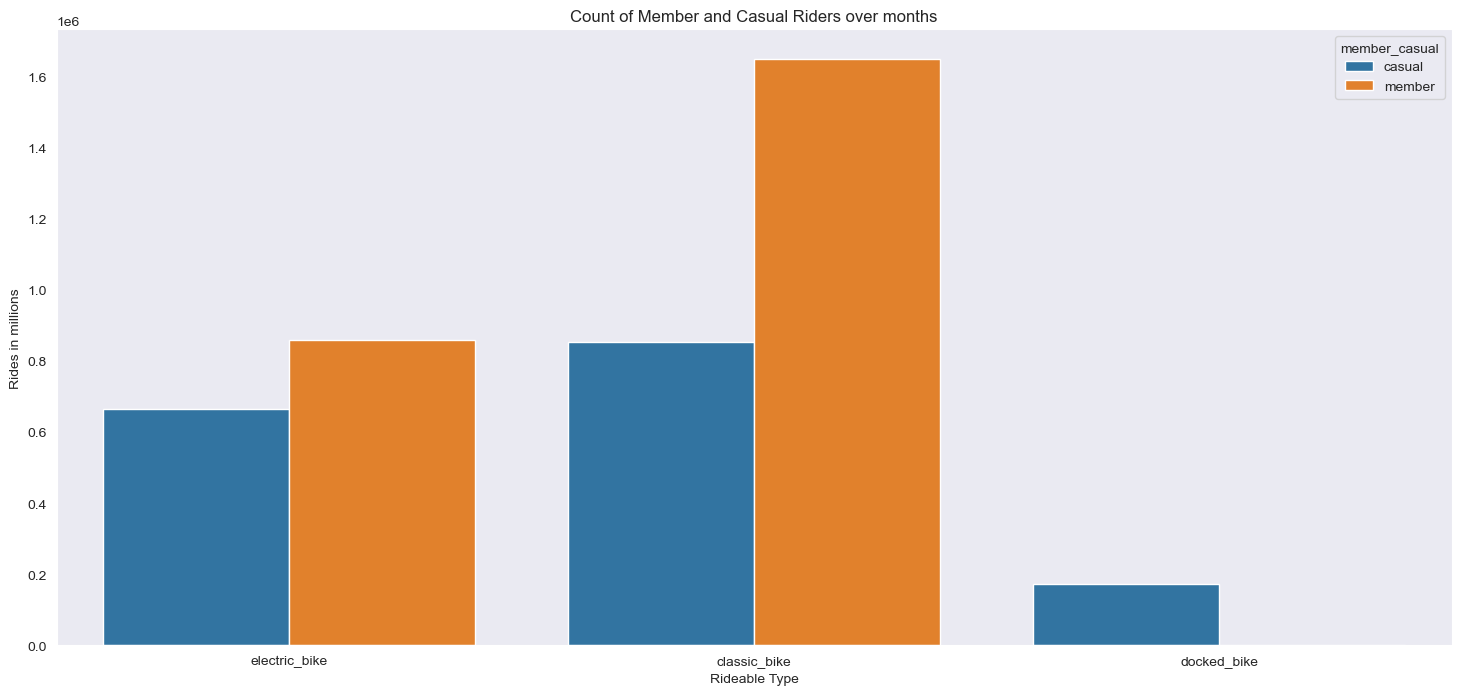

In [50]:
# Plotting the count of Member and Casual riders by rideable type
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='rideable_type', hue='member_casual', data=tripdata)
ax.set_title("Count of Member and Casual Riders over months")
ax.set_xlabel("Rideable Type")
ax.set_ylabel("Rides in millions")

Comparing the rideable types, classic bikes are most common, followed by electric bike and the docked bike has a minority share. The casual riders use electric and classic bikes almost equally, but the members seem to have a strong preference for classic bike over the electric bike.

In [51]:
tripdata.to_csv('tripdata_export')